# Plots for real Gaussian and column-orthogonal matrices

In [1]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
import time, pickle
import logging
logging.basicConfig(level=logging.INFO)

In [2]:
alphas_se = {'gaussian':None,'orthogonal':None}
alphas_gvamp = {'gaussian':None,'orthogonal':None}
mses_uninformed = {'gaussian':None,'orthogonal':None}
mses_informed = {'gaussian':None,'orthogonal':None}
mses_gvamp = {'gaussian':None,'orthogonal':None}

## Loading Gaussian data

In [3]:
#State Evolution data
filename = "Data/results_se_real_gaussian.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
alphas_se['gaussian'] = {'informed':results['alphas'],'uninformed':results['alphas']}
mses_uninformed['gaussian'] = results['mses_uninformed']
mses_informed['gaussian'] = results['mses_informed']

#Close to the transition we have more precise data
filename = "Data/results_se_real_gaussian_transition.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
alphas_transition = results['alphas']
mses_informed_transition = results['mses_informed']
mses_uninformed_transition = results['mses_uninformed']

#Now we replace the data close to the transition by the more precise data
alpha_transition_min = np.min(alphas_transition)
alpha_transition_max = np.max(alphas_transition)
list_indices_to_remove = []
for (i,alpha) in enumerate(alphas_se['gaussian']['informed']):
    if alpha <= alpha_transition_max and alpha >= alpha_transition_min:
        list_indices_to_remove.append(i)

alphas_without_transition = np.delete(alphas_se['gaussian']['informed'],list_indices_to_remove)
mses_informed['gaussian'] = np.delete(mses_informed['gaussian'],list_indices_to_remove)
mses_uninformed['gaussian'] = np.delete(mses_uninformed['gaussian'],list_indices_to_remove)
        
#We add the more precise points and we sort the data according to the alphas
alphas_se['gaussian']['informed'] = np.concatenate((alphas_without_transition,alphas_transition))
alphas_se['gaussian']['uninformed'] = np.concatenate((alphas_without_transition,alphas_transition))
mses_informed['gaussian'] = np.concatenate((mses_informed['gaussian'],mses_informed_transition))
mses_uninformed['gaussian'] = np.concatenate((mses_uninformed['gaussian'],mses_uninformed_transition))

temp_array = sorted(zip(alphas_se['gaussian']['informed'],mses_informed['gaussian']))
mses_informed['gaussian'] = np.array([y for _,y in temp_array])
alphas_se['gaussian']['informed'] = np.array([x for x,_ in temp_array])
temp_array = sorted(zip(alphas_se['gaussian']['uninformed'],mses_uninformed['gaussian']))
mses_uninformed['gaussian'] = np.array([y for _,y in temp_array])
alphas_se['gaussian']['uninformed'] = np.array([x for x,_ in temp_array])

#Some post processing to the SE data to add some trivial points
alphas_se['gaussian']['uninformed'] = np.concatenate((alphas_se['gaussian']['uninformed'],np.array([3.])))
alphas_se['gaussian']['informed'] = np.concatenate((alphas_se['gaussian']['informed'],np.array([3.])))
mses_informed['gaussian'] = np.concatenate((mses_informed['gaussian'],np.array([0.])))
mses_uninformed['gaussian'] = np.concatenate((mses_uninformed['gaussian'],np.array([0.])))

alphas_se['gaussian']['uninformed'] = np.concatenate((np.array([0.]),alphas_se['gaussian']['uninformed']))
alphas_se['gaussian']['informed'] = np.concatenate((np.array([0.]),alphas_se['gaussian']['informed']))
mses_informed['gaussian'] = np.concatenate((np.array([1.]),mses_informed['gaussian']))
mses_uninformed['gaussian'] = np.concatenate((np.array([1.]),mses_uninformed['gaussian']))

#Loading GVAMP data
filename = "Data/results_gvamp_real_gaussian.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
alphas_gvamp['gaussian'] = results['alphas']
mses_gvamp['gaussian'] = {'all':{'mean':results['mses_mean_all'],'std':results['mses_std_all']},'cv_only':{'mean':results['mses_mean_converged_only'],'std':results['mses_std_converged_only']}}

## Loading orthogonal data

In [4]:
#State evolution Data
filename = "Data/results_se_real_orthogonal.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
alphas_se['orthogonal'] =  {'informed':results['alphas'],'uninformed':results['alphas']}
mses_informed['orthogonal'] = results['mses_informed']
mses_uninformed['orthogonal'] = results['mses_uninformed']

#Some post processing to the SE data to add a trivial point
alphas_se['orthogonal']['uninformed'] = np.concatenate((alphas_se['orthogonal']['uninformed'],np.array([3.])))
alphas_se['orthogonal']['informed'] = np.concatenate((alphas_se['orthogonal']['informed'],np.array([3.])))
mses_informed['orthogonal'] = np.concatenate((mses_informed['orthogonal'],np.array([0.])))
mses_uninformed['orthogonal'] = np.concatenate((mses_uninformed['orthogonal'],np.array([0.])))

#Loading GVAMP data
filename = "Data/results_gvamp_orthogonal.pkl"
infile = open(filename,'rb')
results = pickle.load(infile)
infile.close()
alphas_gvamp['orthogonal'] = {'Haar':None,'Hadamard':None}
mses_gvamp['orthogonal'] = {'Haar':None,'Hadamard':None}

#Loading GVAMP data for Haar
alphas_gvamp['orthogonal']['Haar'] = results['alphas']
mses_gvamp['orthogonal']['Haar'] = {'all':{'mean':results['Haar']['mses_mean_all'],'std':results['Haar']['mses_std_all']},'cv_only':{'mean':results['Haar']['mses_mean_converged_only'],'std':results['Haar']['mses_std_converged_only']}}                                  
alphas_gvamp['orthogonal']['Hadamard'] = results['alphas']      
mses_gvamp['orthogonal']['Hadamard'] = {'all':{'mean':results['Hadamard']['mses_mean_all'],'std':results['Hadamard']['mses_std_all']},'cv_only':{'mean':results['Hadamard']['mses_mean_converged_only'],'std':results['Hadamard']['mses_std_converged_only']}}

## The final plot

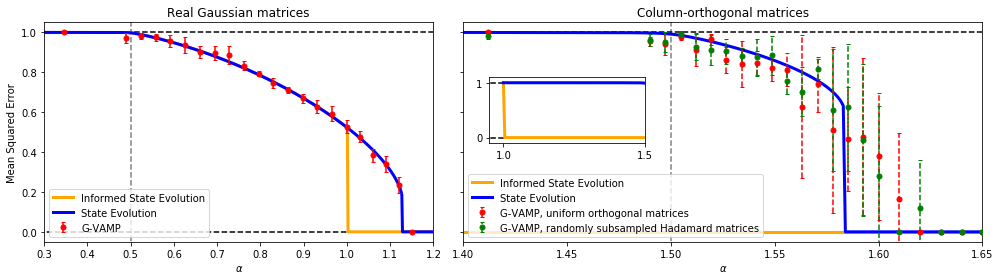

In [5]:
plt.rcParams.update({'font.size': 10})
fig, axes = plt.subplots(1,2,figsize=(14,4),sharey=True,gridspec_kw={'width_ratios': [3, 4]})
limits_inf = {'gaussian':0.3,'orthogonal':1.4}
limits_sup = {'gaussian':1.2,'orthogonal':1.65}
alpha_WR = {'gaussian':0.5,'orthogonal':1.5}

for (i_e,ensemble) in enumerate(['gaussian','orthogonal']):
    ax = axes[i_e]
    ax.set_xlim(limits_inf[ensemble], limits_sup[ensemble])
    ax.set_ylim(-0.05, 1.05)
    ax.set_xlabel(r'$\alpha$')
    if i_e == 0:
        ax.set_ylabel(r'Mean Squared Error')
    if i_e == 0:
        ax.set_title(r'Real Gaussian matrices')
    if i_e == 1:
        ax.set_title(r'Column-orthogonal matrices')
    ax.plot([alpha_WR[ensemble],alpha_WR[ensemble]],[-0.5,1.5],linestyle='--',color='grey',zorder=0)
    ax.plot([0.,3],[1.,1.],linestyle='--',color='black',zorder=0)
    ax.plot([0.,3],[0.,0.],linestyle='--',color='black',zorder=0)

    #State Evolution
    ax.plot(alphas_se[ensemble]['informed'],mses_informed[ensemble], label = "Informed State Evolution",zorder = 2, linewidth=3, color = 'orange')
    ax.plot(alphas_se[ensemble]['uninformed'],mses_uninformed[ensemble], label = "State Evolution",zorder = 2, linewidth=3, color = 'blue')
   
    #GVAMP
    if ensemble == 'gaussian':
        ax.errorbar(alphas_gvamp['gaussian'], mses_gvamp['gaussian']['all']['mean'], yerr = mses_gvamp['gaussian']['all']['std'], label = "G-VAMP", zorder = 4, color = 'red', fmt='o', markersize=5,capsize = 2)
    if ensemble == 'orthogonal':
        eb=ax.errorbar(alphas_gvamp['orthogonal']['Haar'],  mses_gvamp['orthogonal']['Haar']['all']['mean'], yerr = mses_gvamp['orthogonal']['Haar']['all']['std'], label = "G-VAMP, uniform orthogonal matrices", zorder = 4, fmt='o', markersize=5,capsize = 2, color = 'red')
        eb[-1][0].set_linestyle('--')
        eb=ax.errorbar(alphas_gvamp['orthogonal']['Hadamard'],  mses_gvamp['orthogonal']['Hadamard']['all']['mean'], yerr = mses_gvamp['orthogonal']['Hadamard']['all']['std'], label = "G-VAMP, randomly subsampled Hadamard matrices", zorder = 4, fmt='o', markersize=5,capsize = 2, color = 'green')
        eb[-1][0].set_linestyle('--')
        
    #For the Gaussian case we do a zoom on the transition
    if ensemble=='orthogonal':
        axins = ax.inset_axes([0.05, 0.45, 0.3, 0.3])
        axins.set_xlim(0.95, 1.5)
        axins.set_ylim(-0.1, 1.1)
        axins.set_xticks([1.0,1.5])
        axins.set_yticks([0,1])
        #ax.indicate_inset_zoom(axins,label='')
        axins.plot(alphas_se[ensemble]['informed'],mses_informed[ensemble],zorder = 2, linewidth=3, color = 'orange')
        axins.plot(alphas_se[ensemble]['uninformed'],mses_uninformed[ensemble],zorder = 2, linewidth=3, color = 'blue')
        axins.plot([0.,3],[1.,1.],linestyle='--',color='black',zorder=0)
        axins.plot([0.,3],[0.,0.],linestyle='--',color='black',zorder=0)

    ax.legend(fancybox=True,loc='lower left')
plt.tight_layout()
plt.savefig("mse_real_gaussian_orthogonal.pdf")